In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy import optimize
dp = '/home/ebert/jupyter-notebooks/FNode-data'

def expon(x, a, tau, b):
    return b + a*np.exp(-x/tau)

name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
ivars: [u'op_time_ms']
ivar:	0.0	retention:[ 0.82857143  0.77235772] +- [ 0.03785376  0.03179649]
ivar:	0.3	retention:[ 0.62857143  0.5       ] +- [ 0.0437987   0.04384016]
ivar:	0.6	retention:[ 0.6056338  0.3539823] +- [ 0.03841153  0.03783291]
ivar:	0.9	retention:[ 0.46478873  0.27160494] +- [ 0.0459141  0.0415629]
ivar:	1.2	retention:[ 0.52112676  0.203125  ] +- [ 0.0519169   0.04229439]
ivar:	1.5	retention:[ 0.28571429  0.16901408] +- [ 0.04489609  0.03740461]
ivar:	1.8	retention:[ 0.26760563  0.1031746 ] +- [ 0.02681074  0.02279035]
ivar:	2.1	retention:[ 0.29577465  0.08536585] +- [ 0.04053683  0.02595105]
ivar:	2.4	retention:[ 0.18571429  0.02325581] +- [ 0.0222901   0.01115982]
ivar:	2.7	retention:[ 0.21126761  0.00847458] +- [ 0.02578916  0.00709685]
ivar:	3.0	retention:[ 0.17142857  0.        ] +- [ 0.0347622   0.00769796]


<IPython.core.display.Javascript object>


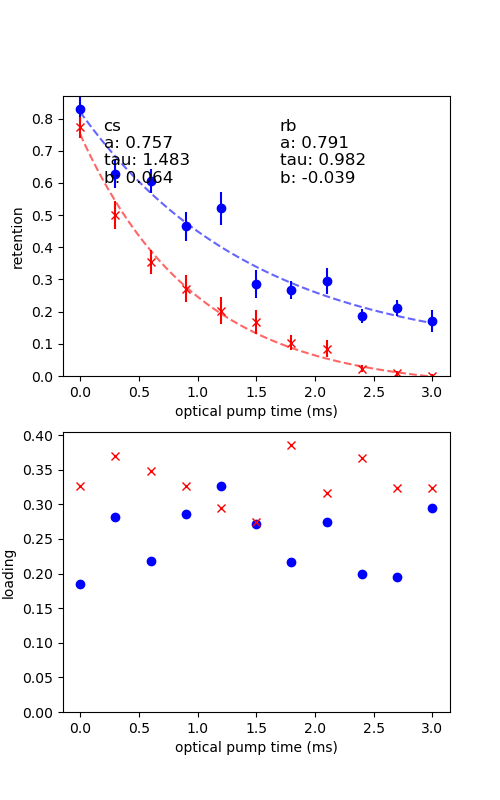

[ 0.75667088  1.48321289  0.06410181]
[ 0.79057749  0.98236489 -0.03916619]


In [21]:
exp_name = ''
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
print "ivars: {}".format(q.experiments[0]['variable_list'])
roi_map = ['cs', 'rb']
fmt_map = ['bo', 'rx']
cs_cuts = [[25],[3]]
rb_cuts = [[35],[3]]
q.set_thresholds(cs_cuts, roi=0)
q.set_thresholds(rb_cuts, roi=1)
retention = q.apply_thresholds()
tbl_str = "ivar:\t{0}\tretention:{1} +- {2}"
entries = np.product(retention['retention'].shape[:-1])
for i in range(entries):
    print(tbl_str.format(
        retention['ivar'].reshape((entries,-1))[i][0],
        retention['retention'].reshape((entries,-1))[i],
        retention['error'].reshape((entries,-1))[i]
    ))
q.save_experiment_data()
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

# plotting
fig, ax = plt.subplots(nrows=2, figsize=(5,8))
plt.subplots_adjust(wspace=0.3)
for i, yvals in enumerate(['retention', 'loading']):
    for e in range(len(retention['ivar'])):
        for r in range(2):            
            if yvals=='retention':
                try:
                    ax[i].errorbar(retention['ivar'][e, :, r], retention[yvals][e, :, r],
                        yerr=retention['error'][e,:,r],
                        fmt=fmt_map[r]
                    )
                except Exception as ee:
                    print(ee)
                    ax[i].plot(retention['ivar'][e, :, 0], retention[yvals][e, :, r], fmt_map[r])
                # fitting
                xs = np.linspace(min(retention['ivar'][e, :, 0]), max(retention['ivar'][e, :, 0]),100)
                guess = [0.8, 0.3, 0]
                try:
                    popt, pcov = optimize.curve_fit(
                        expon,
                        retention['ivar'][e, :, 0],
                        retention[yvals][e, :, r],
                        p0=guess,
                        sigma=retention['error'][e, :, r]
                    )
                except Exception as ee:
                    print ee
                else:
                    ax[i].plot(xs, expon(xs, *popt), fmt_map[r][0]+'--', alpha=0.6)
                    print(popt)
                    fit_data = "{}\na: {:.3f}\ntau: {:.3f}\nb: {:.3f}"
                    ax[i].text(0.2+r*1.5, 0.6, fit_data.format(roi_map[r],*popt), fontsize=12)
            else:
                ax[i].plot(retention['ivar'][e, :, 0], retention[yvals][e, :, r], fmt_map[r])
                
        
    ax[i].set_ylim(0., 1.05*np.nanmax(retention[yvals]))
    ax[i].set_xlabel(xlab)
    ax[i].set_ylabel(yvals)

fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 'exponential_retention_fit.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

<IPython.core.display.Javascript object>


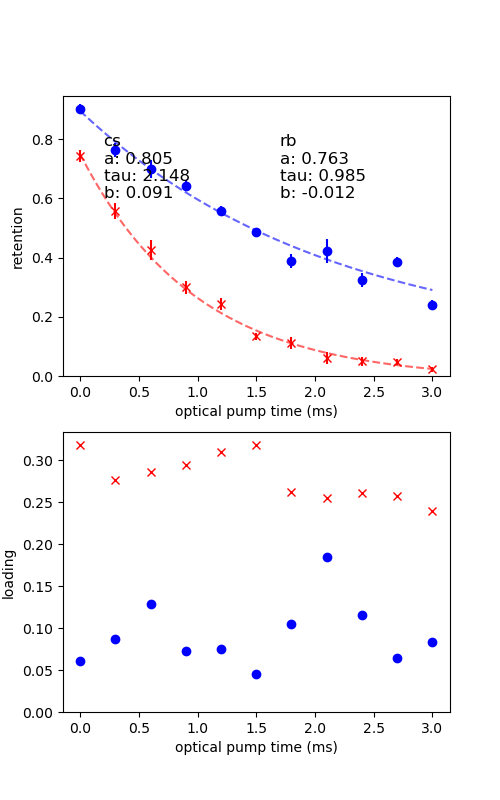

[ 0.80468769  2.14822669  0.09146936]
[ 0.76272021  0.98475538 -0.01241043]


In [16]:
# plotting
fig, ax = plt.subplots(nrows=2, figsize=(5,8))
plt.subplots_adjust(wspace=0.3)
for i, yvals in enumerate(['retention', 'loading']):
    for e in range(len(retention['ivar'])):
        for r in range(2):            
            if yvals=='retention':
                try:
                    ax[i].errorbar(retention['ivar'][e, :, r], retention[yvals][e, :, r],
                        yerr=retention['error'][e,:,r],
                        fmt=fmt_map[r]
                    )
                except Exception as ee:
                    print(ee)
                    ax[i].plot(retention['ivar'][e, :, 0], retention[yvals][e, :, r], fmt_map[r])
                # fitting
                xs = np.linspace(min(retention['ivar'][e, :, 0]), max(retention['ivar'][e, :, 0]),100)
                guess = [0.8, 0.3, 0]
                try:
                    popt, pcov = optimize.curve_fit(
                        expon,
                        retention['ivar'][e, :, 0],
                        retention[yvals][e, :, r],
                        p0=guess,
                        sigma=retention['error'][e, :, r]
                    )
                except Exception as ee:
                    print ee
                else:
                    ax[i].plot(xs, expon(xs, *popt), fmt_map[r][0]+'--', alpha=0.6)
                    print(popt)
                    fit_data = "{}\na: {:.3f}\ntau: {:.3f}\nb: {:.3f}"
                    ax[i].text(0.2+r*1.5, 0.6, fit_data.format(roi_map[r],*popt), fontsize=12)
            else:
                ax[i].plot(retention['ivar'][e, :, 0], retention[yvals][e, :, r], fmt_map[r])
                
        
    ax[i].set_ylim(0., 1.05*np.nanmax(retention[yvals]))
    ax[i].set_xlabel(xlab)
    ax[i].set_ylabel(yvals)

fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 'exponential_retention_fit.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)